In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 設定

In [2]:
file_name = "./yzu.bmp"
origin_img = cv2.imread(file_name)
result_img = origin_img

bar_degree = 0
bar_radius = 0

### Print Image

In [3]:
def show_img(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

### Functions

旋轉

In [4]:
def rotate_img(img, val):
    (h, w, d) = img.shape # 讀取圖片大小
    center = (w // 2, h // 2) # 找到圖片中心
    
    # 取得旋轉矩陣
    M = cv2.getRotationMatrix2D(center, val, 1.0)
    print(val)
    
    result_img = cv2.warpAffine(img, M, (w, h))
    show_img(result_img)

    return result_img

擷取圓形

In [5]:
def crop_circle(radius):
    global origin_img
    (h, w, d) = origin_img.shape # 讀取圖片大小
    center = (w // 2, h // 2)

    # 產生 mask
    mask = np.zeros_like(origin_img)
    mask = cv2.circle(mask, center, radius, (255,255,255), -1)
    print("mask: ")
    show_img(mask)

    # 取得圓形圖片
    crop = cv2.bitwise_and(origin_img, mask)

    return crop

結合兩種圖形

In [6]:
def combine_img(center_img, radius):
    global origin_img
    (h, w, d) = origin_img.shape # 讀取圖片大小
    center = (w // 2, h // 2)
    
    # 產生 mask
    mask = np.zeros_like(origin_img)
    mask = cv2.circle(mask, center, radius, (255,255,255), -1)
    mask = cv2.bitwise_not(mask)
    print("mask: ")
    show_img(mask)

    # 取得圓形圖片 
    crop = cv2.bitwise_and(origin_img, mask)

    # 結合兩張圖片
    combined_img = cv2.bitwise_or(center_img, crop)

    return combined_img

旋轉中心並貼上

In [7]:
def crop_and_rotate(degree, radius):
    center_img = crop_circle(radius); 
    print("center_img")
    show_img(center_img)
    rotated_round_img = rotate_img(center_img, degree)
    print("rotated_round_img")
    show_img(rotated_round_img)
    result_img = combine_img(rotated_round_img, radius)
    print("result_img: ")
    show_img(result_img)

    cv2.imshow("Rotate Image", result_img)

Trackbar 變更後要執行的 Functions

In [8]:
def rotate_bar(degree):
    global bar_degree, bar_radius
    bar_degree = degree

    crop_and_rotate(bar_degree, bar_radius)

In [9]:
def radius_bar(radius):
    global bar_degree, bar_radius
    bar_radius = radius

    crop_and_rotate(bar_degree, bar_radius)

### 主程式碼



建立要顯示圖片的視窗與滑桿

mask: 


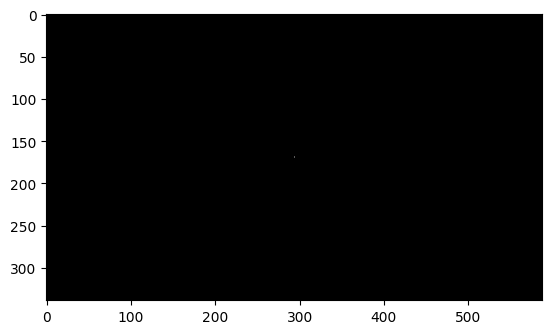

center_img


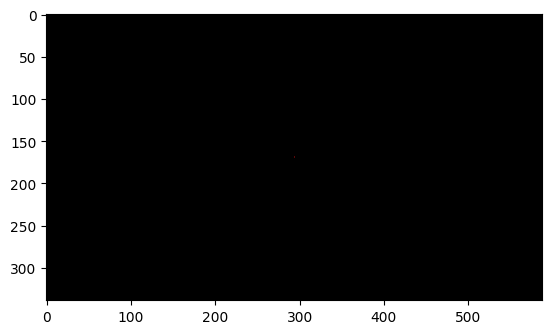

180


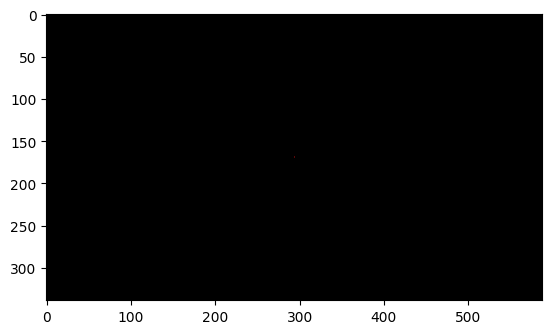

rotated_round_img


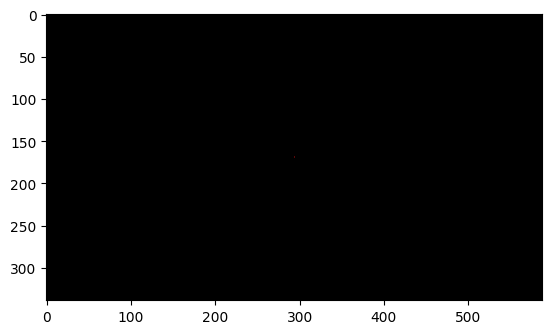

mask: 


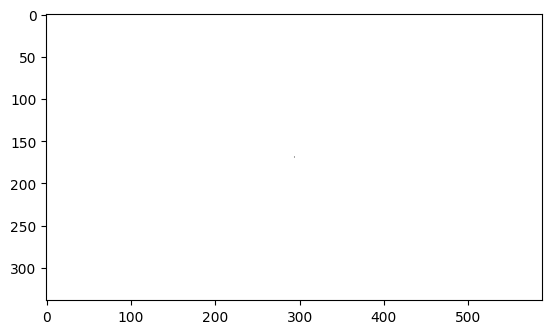

result_img: 


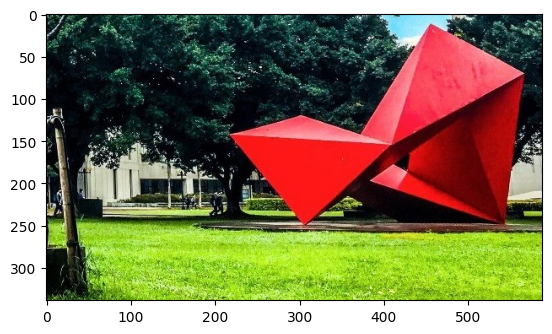

mask: 


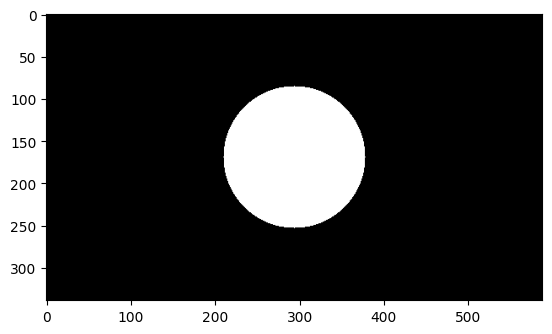

center_img


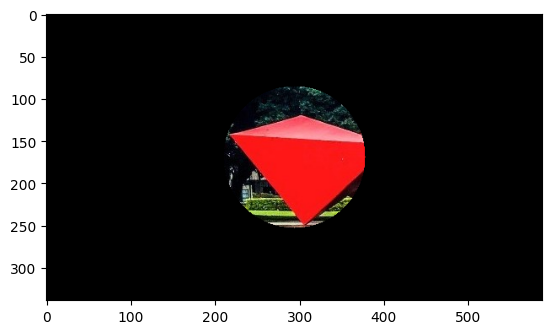

180


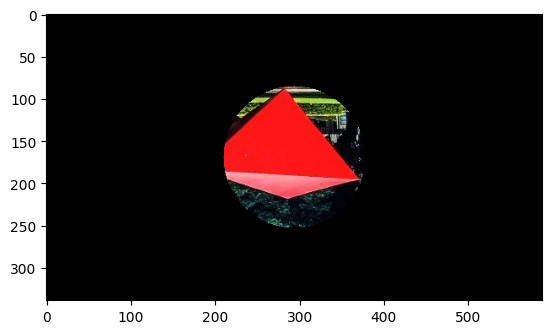

rotated_round_img


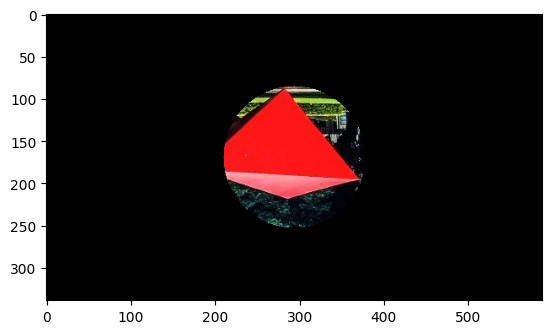

mask: 


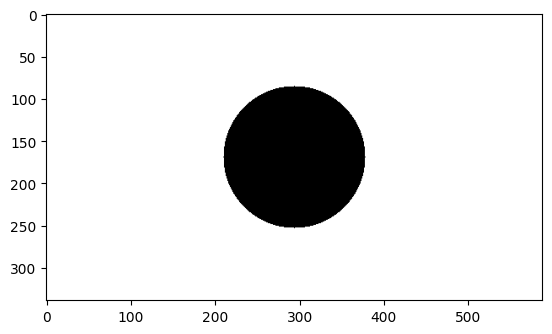

result_img: 


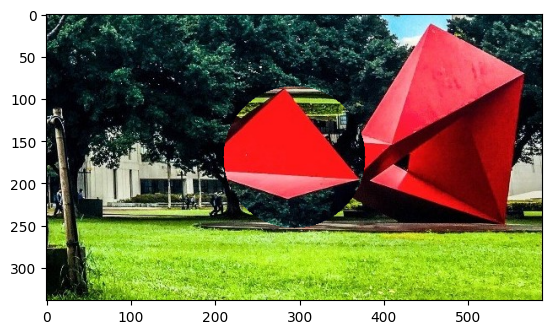

mask: 


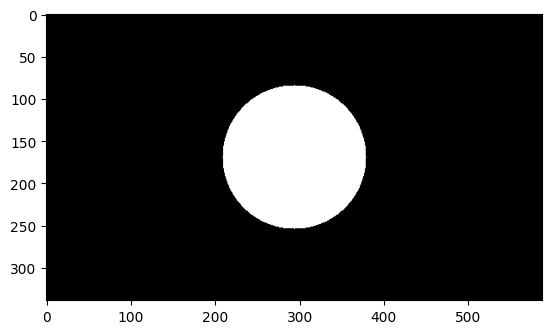

center_img


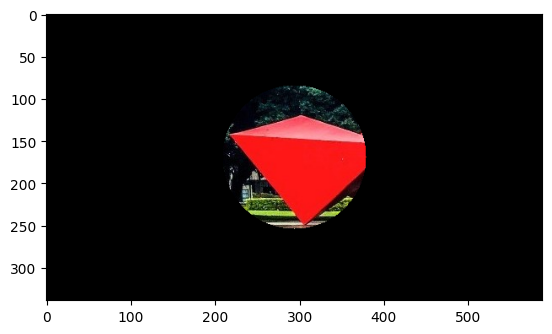

180


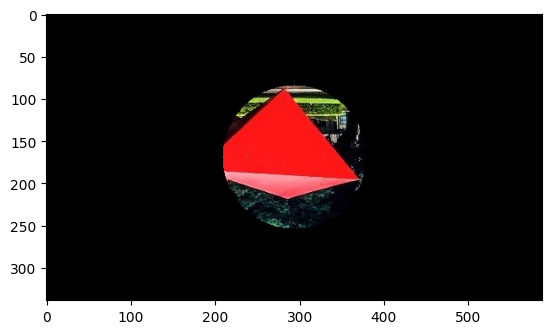

rotated_round_img


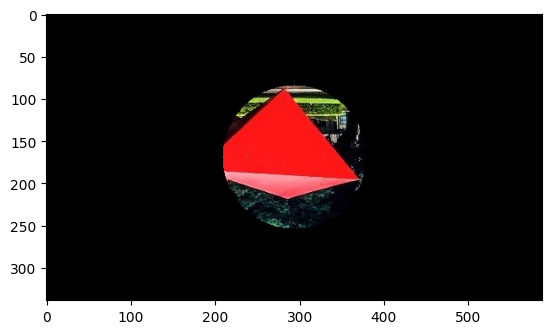

mask: 


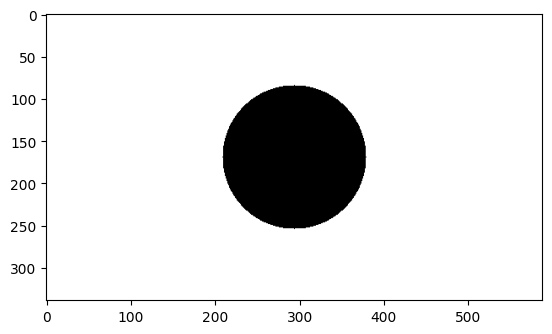

result_img: 


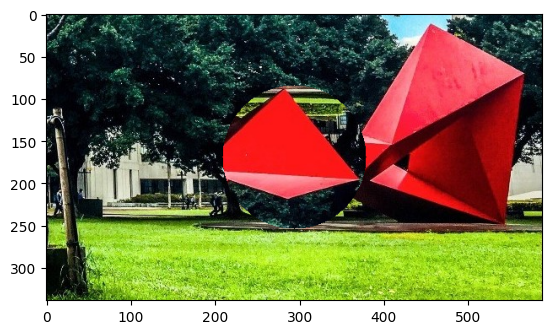

mask: 


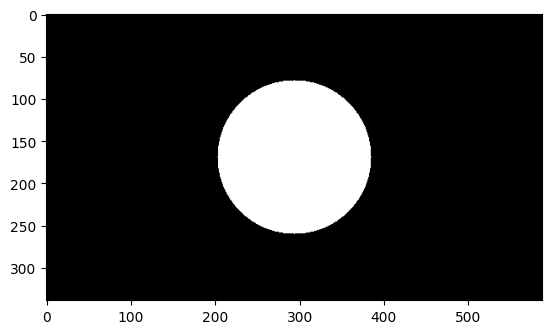

center_img


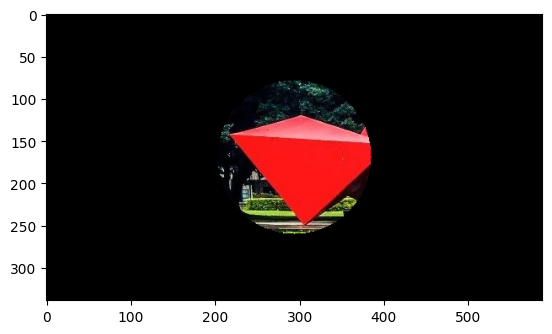

180


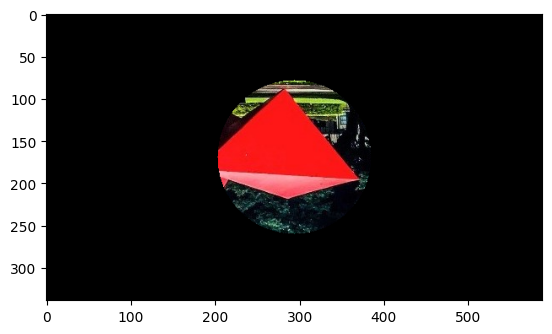

rotated_round_img


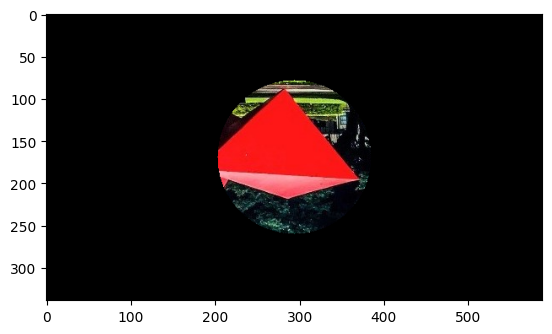

mask: 


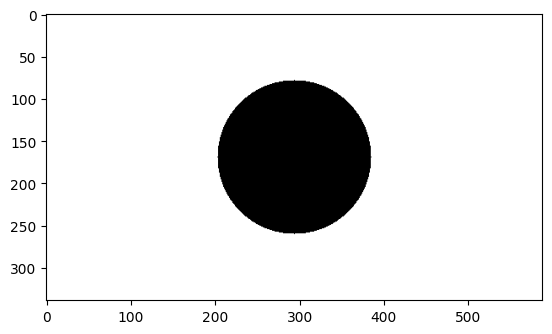

result_img: 


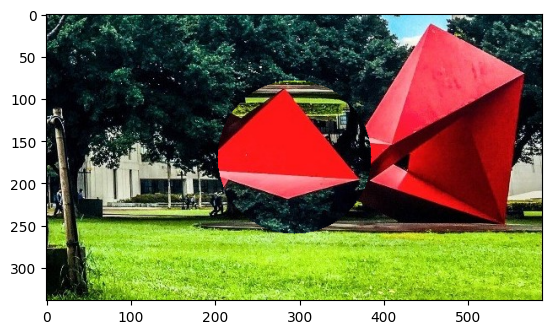

In [10]:
cv2.imshow("Rotate Image", result_img)
cv2.createTrackbar("degree", "Rotate Image", 0, 359, rotate_bar)
cv2.setTrackbarPos("degree", "Rotate Image", 180)

max_radius = min(origin_img.shape[0], origin_img.shape[1]) // 2
cv2.createTrackbar("radius", "Rotate Image", 0, max_radius, radius_bar)
cv2.setTrackbarPos("radius", "Rotate Image", max_radius // 2)

keycode = cv2.waitKey(0)
cv2.destroyAllWindows()

result image

orgin image: 


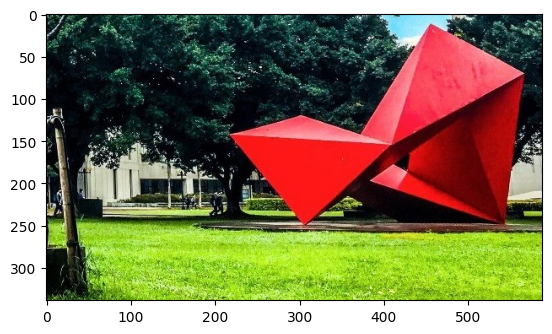

result image: 


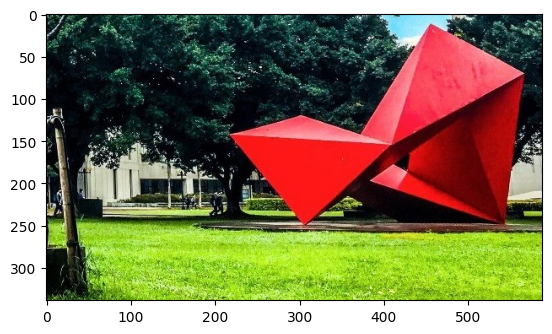

In [11]:
print("orgin image: ")
show_img(origin_img)
print("result image: ")
show_img(result_img)